In [1]:
using MyBioTools.FluTools
using TreeTools
using Plots
pyplot()
using Dates
using Random
using FastaIO


┌ Info: Recompiling stale cache file /home/pierrebc/.julia/compiled/v1.1/MyBioTools.ji for MyBioTools [top-level]
└ @ Base loading.jl:1184


## Building a tree
We need to use a sub-alignment to build a tree. Let's select some strains. 

In [2]:
sp = FluTools.StrainPop("../data/aligned_h3n2_ha.fasta", seqtype=:nt, translate=false, strain="h3n2", segment="ha");

Reading alignment...


In [3]:
FluTools.bin_by_date!(sp, start=Date(2001), binwidth=Day(15), binspacing=Day(31));

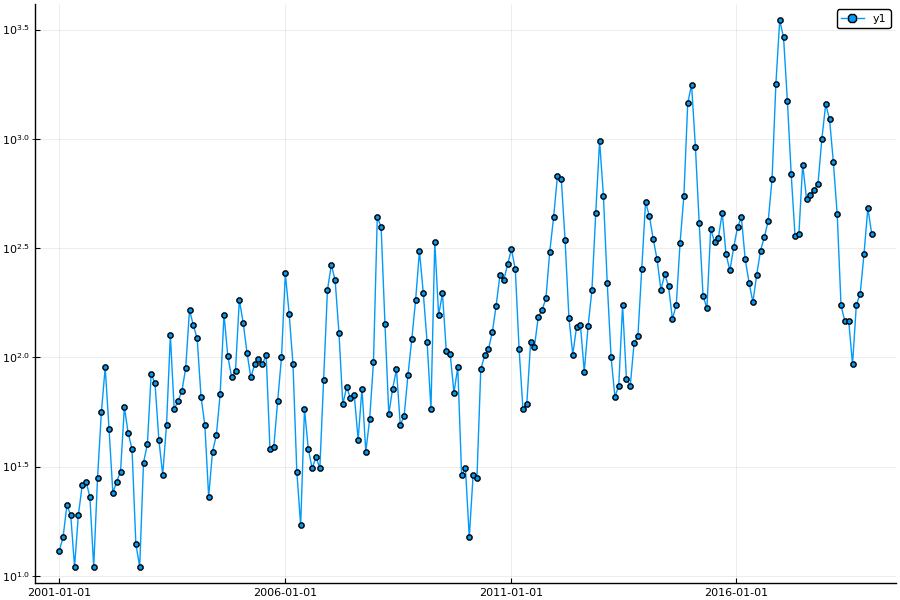

In [111]:
x = []; y = Int64[]; n = Int64[]
ten_permonth = []
hundred_permonth = []
previous_strains = [""]
for (date,strains) in sort(collect(sp.datebin), by = x->x[1][1])
    push!(x, date[1])
    push!(y, length(strains))
    push!(n, min(length(strains), 100)) # 50 per month
    if !isempty(intersect(previous_strains, [x.strain for x in strains]))
        println("intersect")
    end
    for s in strains[ randperm(length(strains))[1:min(10, length(strains))] ]
        push!(ten_permonth, FluTools.write_strain(s, seqtype=:nt, header=:label))
    end
    for s in strains[ randperm(length(strains))[1:min(100, length(strains))] ]
        push!(hundred_permonth, FluTools.write_strain(s,seqtype=:nt, header=:label))
    end   
    previous_strains = [x.strain for x in strains]
#     println(date)
end
plot(x,y, yscale=:log10, size=(900,600), marker=:o)

In [113]:
FluTools.write_strain(sp.strains[1])

("A/HubeiXianningShashi/1154/2008|?|?|2008-08-06|china|?|?|?|?|?|?|?|", "")

In [114]:
# writefasta("../data/sub_alignments/aligned_h3n2_ha_10permonth.fasta", ten_permonth)
writefasta("$(homedir())/Documents/BaleLabo/scicore/niralu56/FluReview/h3n2/trees/tree_ha_10permonth_NEW/aligned_h3n2_ha_sub.fasta", ten_permonth)

In [115]:
# writefasta("../data/sub_alignments/aligned_h3n2_ha_100permonth.fasta", hundred_permonth)
writefasta("$(homedir())/Documents/BaleLabo/scicore/niralu56/FluReview/h3n2/trees/tree_ha_100permonth_NEW/aligned_h3n2_ha_sub.fasta", hundred_permonth)

In [116]:
FluTools.write_strainpop("$(homedir())/Documents/BaleLabo/scicore/niralu56/FluReview/h3n2/trees/tree_ha_all_NEW/aligned_h3n2_ha_sub.fasta", sp, seqtype=:nt, header=:label)

## Parameters of LBI

In [61]:
sp = FluTools.StrainPop("../data/aligned_h3n2_ha.fasta", seqtype=:nt, translate=false, strain="h3n2", segment="ha", read_sequences=true);
date_dict = Dict(s.strain=>s.date for s in sp.strains)
tree_10 = read_tree("../data/trees/tree_ha_10permonth_NEW/tree_raw.nwk", DataType=LBIData);
TreeTools.get_node_dates!(tree_10, date_dict)

Reading alignment...
Checking Tree


UndefVarError: UndefVarError: tree not defined

In [63]:
tree_10 = read_tree("../data/trees/tree_ha_10permonth_NEW/tree_raw.nwk", DataType=LBIData);


Checking Tree


UndefVarError: UndefVarError: tree not defined

In [17]:
n = 200
random_nodes = [tree_10.leaves[i] for i in randperm(length(tree_10.leaves))[1:n]];
x = []; y = Float64[]
for n1 in random_nodes
    for n2 in random_nodes
        dmax = max(n1.data.date, n2.data.date)
        dmin = min(n1.data.date, n2.data.date)
#         if dmax - dmin > Day(6000)
#             println(n1.label, n2.label)
#         end
        push!(x, node_divtime(n1,n2))
#         push!(x, dmax-dmin)
#         push!(y, abs(node_divtime(tree_10.root, n1) - node_divtime(tree_10.root, n2)))
    end
end

A/Taiwan/22104/2001A/Concepcion/47476/2018
A/Taiwan/22104/2001A/Navarra/238/2019
A/Taiwan/22104/2001A/NewJersey/43/2018
A/Taiwan/22104/2001A/Slovenia/3012/2018
A/Taiwan/22104/2001A/SaudiArabia/459160/2018
A/Taiwan/22104/2001A/Berlin/57/2018
A/Taiwan/22104/2001A/Oman/5661/2018
A/Taiwan/22104/2001A/Ontario/RV3022/2018
A/Taiwan/22104/2001A/Vietnam/205/2018
A/Taiwan/22104/2001A/Cambodia/914/2017
A/Taiwan/22104/2001A/SantaCatarina/487/2018
A/Taiwan/22104/2001A/Kuwait/6408/2018
A/Taiwan/22104/2001A/Alberta/RV3924/2018
A/Taiwan/22104/2001A/Hawaii/47/2018
A/Taiwan/22104/2001A/Brazil/4139/2018
A/Taiwan/22104/2001A/NewHampshire/12/2018
A/Taiwan/22104/2001A/Nagano/2197/2018
A/Concepcion/47476/2018A/Taiwan/22104/2001
A/Concepcion/47476/2018A/Colombia/3026/2001
A/Concepcion/47476/2018A/Bangkok/28/2001
A/Concepcion/47476/2018A/NewYork/82/2001
A/Concepcion/47476/2018A/Okinawa/184/2001
A/Concepcion/47476/2018A/Argentina/5/2001
A/Concepcion/47476/2018A/Okinawa/208/2001
A/Concepcion/47476/2018A/Indonesi

A/Okinawa/208/2001A/Hawaii/47/2018
A/Okinawa/208/2001A/Brazil/4139/2018
A/Okinawa/208/2001A/Nagano/2197/2018
A/SantaCatarina/487/2018A/Taiwan/22104/2001
A/SantaCatarina/487/2018A/Colombia/3026/2001
A/SantaCatarina/487/2018A/Bangkok/28/2001
A/SantaCatarina/487/2018A/Okinawa/184/2001
A/SantaCatarina/487/2018A/Argentina/5/2001
A/SantaCatarina/487/2018A/Okinawa/208/2001
A/SantaCatarina/487/2018A/Indonesia/8338/2001
A/SantaCatarina/487/2018A/HongKong/CUHK24825/2001
A/SantaCatarina/487/2018A/Daegu/58/2001
A/SantaCatarina/487/2018A/Nepal/g-2079/2001
A/Kuwait/6408/2018A/Taiwan/22104/2001
A/Kuwait/6408/2018A/Colombia/3026/2001
A/Kuwait/6408/2018A/Bangkok/28/2001
A/Kuwait/6408/2018A/NewYork/82/2001
A/Kuwait/6408/2018A/Massachusetts/2/2002
A/Kuwait/6408/2018A/Okinawa/184/2001
A/Kuwait/6408/2018A/Argentina/5/2001
A/Kuwait/6408/2018A/Okinawa/208/2001
A/Kuwait/6408/2018A/Indonesia/8338/2001
A/Kuwait/6408/2018A/HongKong/CUHK24825/2001
A/Kuwait/6408/2018A/Daegu/58/2001
A/Kuwait/6408/2018A/Nepal/g-2079

In [58]:
node_leavesclade_labels(n1.anc.anc)

4-element Array{String,1}:
 "A/Taiwan/160/2001"        
 "A/HongKong/CUHK22888/2001"
 "A/HongKong/CUHK24825/2001"
 "A/HongKong/CUHK33406/2001"

In [57]:
n1.data.tau + n1.anc.data.tau

0.00170928

In [59]:
n2.data.tau

0.00058617

In [60]:
lca(n1,n2).label

""

In [55]:
n1 = tree_10.lleaves["A/HongKong/CUHK24825/2001"];
n2 = tree_10.lleaves["A/Concepcion/47476/2018"];

In [56]:
node_divtime(n1,n2)

0.00117533

In [34]:
sum(sp.straindict[n1.label].codon_seq .!= sp.straindict[n2.label].codon_seq)/length(sp.straindict[n2.label].codon_seq)

0.18374558303886926

In [48]:
sp.straindict[n2.label].codon_seq[1:20]

20-element Array{String,1}:
 "ATG"
 "AAG"
 "ACT"
 "ATC"
 "ATT"
 "GCT"
 "TTG"
 "AGC"
 "TAC"
 "ATT"
 "CTA"
 "TGT"
 "CTG"
 "GTT"
 "TTC"
 "GCT"
 "CAA"
 "AAA"
 "ATT"
 "CCT"

In [46]:
(sp.straindict[n1.label].codon_seq .!= sp.straindict[n2.label].codon_seq)[1:20]

20-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
  true
 false
 false
 false
 false
 false
 false
 false
  true
  true

In [47]:
sp.straindict[n1.label].codon_seq[1:20]

20-element Array{String,1}:
 "ATG"
 "AAG"
 "ACT"
 "ATC"
 "ATT"
 "GCT"
 "TTG"
 "AGC"
 "TAC"
 "ATT"
 "TTA"
 "TGT"
 "CTG"
 "GTT"
 "TTC"
 "GCT"
 "CAA"
 "AAA"
 "CTT"
 "CCC"

## Reproductability of LBI 

In [11]:
typeof(tree_10.nodes)

Dict{Int64,TreeNode{LBIData}}